<a href="https://colab.research.google.com/github/qkrwoghd04/-Adding_captions-_to-_the-_dataset-_images/blob/main/Creating_captioning_for_Iamges_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Creating captions for images using the COCA model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install open_clip_torch transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 49.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 47.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 63.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import open_clip
import torch

# load pretrained mscoco model
model, _, transform = open_clip.create_model_and_transforms(
  model_name="coca_ViT-L-14",
  pretrained="mscoco_finetuned_laion2B-s13B-b90k"
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


open_clip_pytorch_model.bin:   0%|          | 0.00/2.55G [00:00<?, ?B/s]

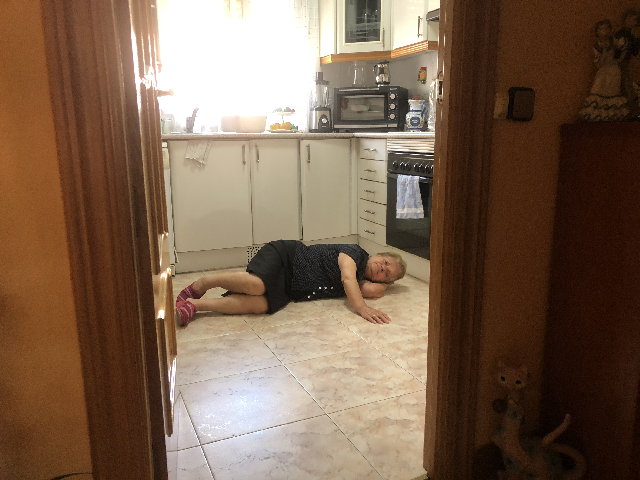

In [ ]:
from IPython.display import Image
Image(r'/content/drive/MyDrive/image_dataset_splited/test/Fall/Fall_001.jpg')

In [ ]:
import os
from PIL import Image
import torch

def generate_caption_for_folder(folder_path, output_file_path):
    with open(output_file_path, 'w') as output_file:  # 결과를 저장할 파일을 엽니다.
        for root, dirs, files in os.walk(folder_path):
            for file in files:
                if file.endswith((".jpg", ".png")):  # 이미지 파일 형식 확인
                    file_path = os.path.join(root, file)
                    try:
                        im = Image.open(file_path).convert("RGB")
                        im = transform(im).unsqueeze(0)  # 이미지 전처리

                        with torch.no_grad(), torch.cuda.amp.autocast():
                            generated = model.generate(im)

                        caption = open_clip.decode(generated[0]).split("<end_of_text>")[0].replace("<start_of_text>", "").strip()
                        output_line = f"{file},{caption}\n"
                        output_file.write(output_line)  # 파일에 쓰기
                    except Exception as e:
                        print(f"Error processing {file_path}: {e}")

# 결과 파일 경로
output_file_path = "/content/drive/MyDrive/image_dataset/processed/captions.txt"

# 'Fall' 폴더에 대한 캡션 생성 및 저장
generate_caption_for_folder("/content/drive/MyDrive/image_dataset/processed/Fall", output_file_path)
# 'Sleep' 폴더에 대해서도 필요한 경우 같은 방법으로 호출
generate_caption_for_folder("/content/drive/MyDrive/image_dataset/processed/Sleep", output_file_path)
